In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from deep_translator import GoogleTranslator
from transformers import pipeline

import os
from colorama import Fore

In [3]:
tqdm.pandas()
data_loc = '../data/'

# Reparations on data2h

In [141]:
with open(data_loc+'data2h_refugees.OLDcsv', 'rb') as f:
    doc = f.read()
print(doc.decode('utf-8'))

sep=;
d a t a _ d a t e ; i n d i v i d u a l s 
 2 0 2 2 - 0 2 - 2 4 ; 8 2 8 2 7 
 2 0 2 2 - 0 2 - 2 5 ; 1 8 7 5 4 3 
 2 0 2 2 - 0 2 - 2 6 ; 3 3 5 4 2 2 
 2 0 2 2 - 0 2 - 2 7 ; 5 0 6 9 1 4 
 2 0 2 2 - 0 2 - 2 8 ; 6 7 0 4 1 5 
 2 0 2 2 - 0 3 - 0 1 ; 8 3 8 5 0 2 
 2 0 2 2 - 0 3 - 0 2 ; 1 0 1 2 4 0 0 
 2 0 2 2 - 0 3 - 0 3 ; 1 1 7 8 6 8 9 
 2 0 2 2 - 0 3 - 0 4 ; 1 3 5 0 4 4 6 
 2 0 2 2 - 0 3 - 0 5 ; 1 5 4 8 1 7 8 
 2 0 2 2 - 0 3 - 0 6 ; 1 7 5 3 8 1 2 
 2 0 2 2 - 0 3 - 0 7 ; 1 9 6 1 0 5 3 
 2 0 2 2 - 0 3 - 0 8 ; 2 1 4 4 9 7 1 
 2 0 2 2 - 0 3 - 0 9 ; 2 3 1 5 4 0 2 
 2 0 2 2 - 0 3 - 1 0 ; 2 4 4 9 7 6 7 
 2 0 2 2 - 0 3 - 1 1 ; 2 5 7 0 1 0 6 
 2 0 2 2 - 0 3 - 1 2 ; 2 6 8 5 9 8 4 
 2 0 2 2 - 0 3 - 1 3 ; 2 8 4 4 2 3 5 
 2 0 2 2 - 0 3 - 1 4 ; 2 9 5 8 7 0 9 
 2 0 2 2 - 0 3 - 1 5 ; 3 0 6 9 7 9 5 
 2 0 2 2 - 0 3 - 1 6 ; 3 1 7 4 5 9 0 
 2 0 2 2 - 0 3 - 1 7 ; 3 2 7 0 0 6 3 
 2 0 2 2 - 0 3 - 1 8 ; 3 3 5 2 6 2 2 
 2 0 2 2 - 0 3 - 1 9 ; 3 4 2 9 2 8 3 
 2 0 2 2 - 0 3 - 2 0 ; 3 4 9 6 6 1 8 
 2 0 2 2 - 0 3 

In [140]:
data2h_refugees_REPAIRED = [[e for e in l.split(';')] for l in data2h_refugees.split('\n')][1:]
data2h_refugees_REPAIRED = pd.DataFrame(data2h_refugees_REPAIRED[1:], columns=data2h_refugees_REPAIRED[0])
data2h_refugees_REPAIRED["individuals"] = data2h_refugees_REPAIRED.individuals.apply(int)
data2h_refugees_REPAIRED.to_csv(data_loc+'data2h_refugees_REPAIRED.csv', index=False)
data2h_refugees_REPAIRED

,data_date,individuals
0,2022-02-24,82827
1,2022-02-25,187543
2,2022-02-26,335422
3,2022-02-27,506914
4,2022-02-28,670415
5,2022-03-01,838502
6,2022-03-02,1012400
7,2022-03-03,1178689
8,2022-03-04,1350446
9,2022-03-05,1548178


# New datasets

In [4]:
files = os.listdir(data_loc)
files = [f for f in files if '.csv' in f]

# _files = os.listdir('TWEETS/')
# _files = ['TWEETS/'+f for f in _files if '.csv' in f]
# files += _files

files

['brentoilspotprice.csv',
 'currency.csv',
 'KyivIndependent_tweets.csv',
 'refugees_data2h_REPAIRED.csv',
 'russia_losses_equipment.csv',
 'russia_losses_personnel.csv',
 'sentiment_news_articles_small.csv',
 'sentiment_tweets_small.csv']

In [5]:
def load_csv(path):
    key = path.split('.csv')[0].split('/')[-1]
    print(f"Loading {key}...")
    if '.gzip' in path:
        df = pd.read_csv(path, encoding='utf-8', compression='gzip')
    else :
        df = pd.read_csv(path)
    print(f"Loaded {key} !")
    return key, df

In [6]:
dfs = [load_csv(data_loc+f) for f in files]
dfs = dict(dfs)

Loading brentoilspotprice...
Loaded brentoilspotprice !
Loading currency...
Loaded currency !
Loading KyivIndependent_tweets...
Loaded KyivIndependent_tweets !
Loading refugees_data2h_REPAIRED...
Loaded refugees_data2h_REPAIRED !
Loading russia_losses_equipment...
Loaded russia_losses_equipment !
Loading russia_losses_personnel...
Loaded russia_losses_personnel !
Loading sentiment_news_articles_small...
Loaded sentiment_news_articles_small !
Loading sentiment_tweets_small...
Loaded sentiment_tweets_small !


In [8]:
dfs['refugees_data2h_REPAIRED']

,data_date,individuals
0,2022-02-24,82827
1,2022-02-25,187543
2,2022-02-26,335422
3,2022-02-27,506914
4,2022-02-28,670415
5,2022-03-01,838502
6,2022-03-02,1012400
7,2022-03-03,1178689
8,2022-03-04,1350446
9,2022-03-05,1548178


# Twitter dataset exploration

In [9]:
tweets_loc = 'TWEETS/'
tweets_files = [f for f in os.listdir(data_loc+tweets_loc) if '.csv' in f]
tweets_files

['0227_UkraineCombinedTweetsDeduped.csv.gzip',
 '0227_UkraineCombinedTweetsDeduped_131611.csv.gzip',
 '0228_UkraineCombinedTweetsDeduped_part1.csv.gzip',
 '0228_UkraineCombinedTweetsDeduped_part2.csv.gzip',
 '0301_UkraineCombinedTweetsDeduped.csv.gzip',
 '0302_UkraineCombinedTweetsDeduped.csv.gzip',
 '0303_UkraineCombinedTweetsDeduped.csv.gzip',
 '0304_UkraineCombinedTweetsDeduped.csv.gzip',
 '0305_UkraineCombinedTweetsDeduped.csv.gzip',
 '0306_UkraineCombinedTweetsDeduped.csv.gzip',
 '0307_UkraineCombinedTweetsDeduped.csv.gzip',
 '0308_UkraineCombinedTweetsDeduped.csv.gzip',
 '0309_UkraineCombinedTweetsDeduped.csv.gzip',
 '0310_UkraineCombinedTweetsDeduped.csv.gzip',
 '0311_UkraineCombinedTweetsDeduped.csv.gzip',
 '0312_UkraineCombinedTweetsDeduped.csv.gzip',
 '0313_UkraineCombinedTweetsDeduped.csv.gzip',
 '0314_UkraineCombinedTweetsDeduped.csv.gzip',
 '0315_UkraineCombinedTweetsDeduped.csv.gzip',
 '0316_UkraineCombinedTweetsDeduped.csv.gzip',
 '0317_UkraineCombinedTweetsDeduped.csv.g

## Renaming tweets

In [18]:
translate_months = {
    'FEB':'02',
    'MAR':'03',
}

def rename_tweets(tweets_files):
    results = []
    
    for f in tweets_files:

        # Case 'UkraineCombinedTweetsDeduped_XXXX'
        if f[0] == 'U' and '_' in f:
            date = f.split('_')[1].split('.')[0]
            month = date[:3]
            day = date[3:]
            month = translate_months[month]

            beginning = f.split('_')[0]
            if len(f.split('_')) > 2 : intermediate = beginning = f.split('_')[2]
            else: intermediate = ''
            ending = '.'.join(f.split('_')[1].split('.')[1:])

            final = month+day+'_'+beginning+intermediate+'.'+ending
            results.append((f, final))
        else :
            results.append((f, f))
    
    results = [f for f in results if 'UkraineCombinedTweetsDeduped' in f[1]]
    return results

renaming_dict = dict(rename_tweets(tweets_files))

for o,n in renaming_dict.items():
    os.rename(tweets_loc+o, tweets_loc+n)

## Exploring tweets

In [12]:
tf = tweets_files[0]
tf

'0227_UkraineCombinedTweetsDeduped.csv.gzip'

In [13]:
df_raw = pd.read_csv(data_loc+tweets_loc+tf, compression='gzip')
df_raw.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
1,1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,Like everybody else I am rooting for Ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011
2,1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#Ukrayna Güvenlik Servisi, #Rus finosu #Kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979
3,1141803,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",NaN,4847,4080,33666,2012-06-02 21:53:59.000000,1497724980573966346,2022-02-27 00:07:16,1,We elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0,2022-02-27 00:09:33.051823
4,1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812


In [55]:
_to_drop=['Unnamed: 0','acctdesc', 'following', 'usercreatedts', 'coordinates', 'favorite_count']
df = df_raw.drop(columns=_to_drop)
df.set_index('tweetid', inplace=True)

ltest = df.groupby('language').first().reset_index()[['language', 'text']].values

In [66]:
ltest_tr = []

for l, t in ltest:
    try :
        print(Fore.BLACK + '############')
        translator = GoogleTranslator(source=l)
        tr = translator.translate(t)
        print(t)
        print(Fore.BLUE + tr)
        ltest_tr.append((t, tr))
    except Exception as e :
        print(Fore.RED + str(e))

############
ምዕራባውያን ሩሲያን ከስዊፍት ዓለም ዓቀፍ የባንክ ስርዓት አገዱ

አሜሪካ፣ ብሪታኒያ፣ አውሮፓ ህብረት ኮሚሽንና ካናዳ እርምጃውን መውሰዳቸውን አስታውቀዋል፡፡
እርምጃው በመጪዎቹ ቀናት ተግባራዊ ይደረጋል ተብሏል

ቤተሰብ ይሁኑ! 

#RussiaUkraineWar https://t.co/8djpTPdURh
Westerners block Russia from Swift international banking system

The United States, Britain, the European Commission and Canada have all taken action.
The action is expected to take effect in the coming days

Be a family!

#RussiaUkraineWar https://t.co/8djpTPdURh
############
عاجل 
٥٠٠ دبابة روسية تقترب من العاصمة كييف من كل الجهات .
 #روسيا_اوكرانيا #روسيا #أوكرانيا #Russia #Ukrania 
#Kyiv
Urgent
500 Russian tanks approaching the capital, Kyiv, from all sides.
 #Russia #Ukraine #Russia #Ukraine
#Kyiv
############
@McFaul Героям слава! #Ukraine #SupportUkraine
@McFaul Glory to the heroes! #Ukraine #SupportUkraine
############
কেন্দ্রীয় মন্ত্রী শ্রী @PiyushGoyalOffc মুম্বাই বিমানবন্দরে ইউক্রেন থেকে সরিয়ে নেওয়া ভারতীয় ছাত্রদের স্বাগত জানালেন৷ #ukraine #INDIA #PiyushGoyal https://t.co/O

### Emotions

In [107]:
def get_top_label(scores, topn=1, emo_only=True):
    s = scores[0]
    topn = min(topn, len(s))
    s = sorted(s, key=lambda d : d['score'], reverse=True)
    s = s[:topn]
    if emo_only: s = [d['label'] for d in s]
    if topn==1 : s = s[0]
    return s

In [93]:
ttest = ltest_tr[3][1]
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

In [108]:
get_top_label(emotion_classifier(ttest))

'fear'

### Sentiment

In [104]:
ttest = ltest_tr[3][1]

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, return_all_scores=True)

In [109]:
get_top_label(sentiment_task(ttest))

'Neutral'

### Batch test

In [111]:
def get_translator(l):
    try :
        translator = GoogleTranslator(source=l)
        return (l, translator)
    except :
        return None

In [120]:
def _process_tweet(t):
    return t

In [128]:
def translate_batch(df, l, translator):
    tmp = df.loc[df.language==l, 'text']
    tmp = tmp.apply(_process_tweet)
    tmp = tmp.progress_apply(translator.translate)
    return tmp

In [136]:
def process_tweets(df):
    
    ## Translate
    # Get languages
    print(f"Getting all translators...")
    translators = df.language.unique()
    nlang = len(translators)
    translators = [get_translator(l) for l in translators]
    translators = [t for t in translators if t != None]
    translators = dict(translators)
    print(f"Got {len(translators)} translators ({len(translators)/nlang*100:.2f}%)!")
    
    # Translate for each available language
    for l in []:#translators.keys():
        print(f"\nStarting translation for {l}...")
        tr = translate_batch(df, l, translators[l])
        df.loc[df.language == l, 'translated'] = tr
        print(f"Translation done for {l}!")
        
    # Add english to only use translated column
    df.loc[df.language == 'en', 'translated'] = df.loc[df.language == 'en', 'text']
    
    ## Get Sentiment
    model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
    print(f"Starting sentiment analysis using {model_path}...")
    sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, return_all_scores=True)
    
    sen = df.loc[~df.translated.isna(), 'translated'].progress_apply(sentiment_task)
    sen = sen.apply(get_top_label)
    df['sentiment'] = sen
    print(f"Finished sentiment analysis!")
    
    # Get emotion
    
process_tweets(df)

Getting all translators...
Got 57 translators (91.94%)!


  0%|          | 0/227513 [00:00<?, ?it/s]

In [138]:
tweets_files[0]

'0227_UkraineCombinedTweetsDeduped.csv.gzip'

In [140]:
df.to_csv(data_loc+'TWEETS_SENTIMENT/EN_'+tweets_files[0])

<AxesSubplot:xlabel='language'>

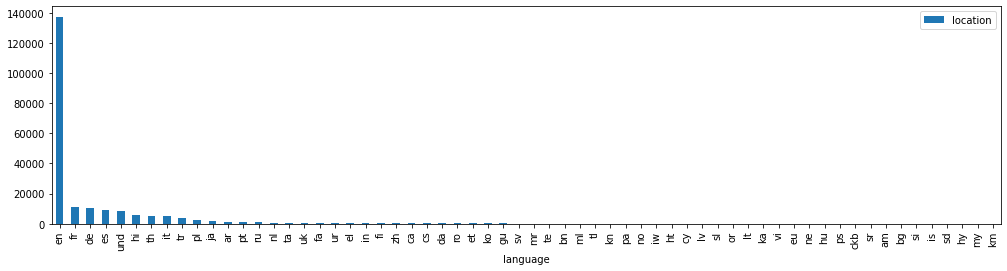

In [147]:
df.groupby('language').count()['location'].reset_index().sort_values("location", ascending=False).plot(x='language', y='location', kind='bar', figsize=(17, 4))

## Exploring language distribution in tweets


############### 0227_UkraineCombinedTweetsDeduped.csv.gzip


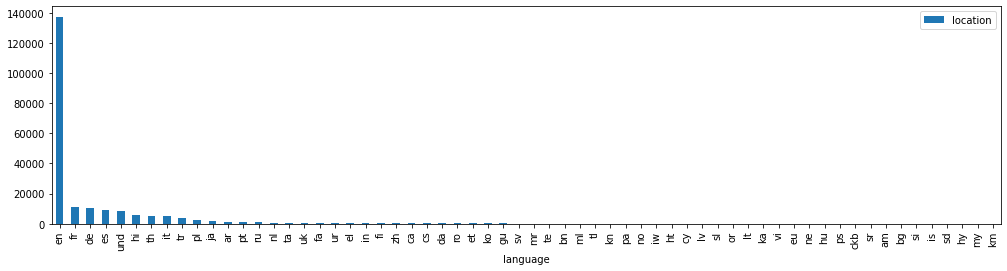

C:\Users\nicod\anaconda3\envs\plt\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



############### 0227_UkraineCombinedTweetsDeduped_131611.csv.gzip


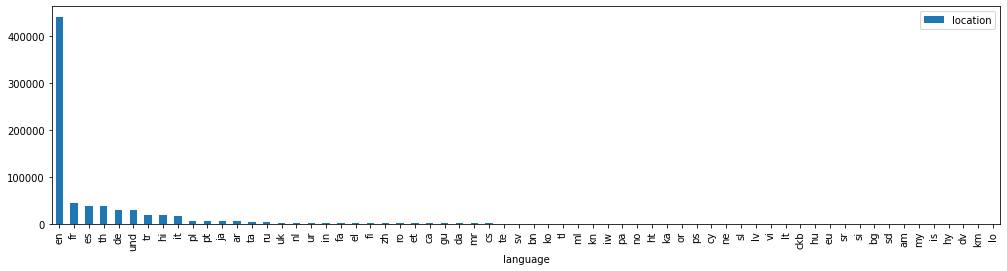


############### 0228_UkraineCombinedTweetsDeduped_part1.csv.gzip


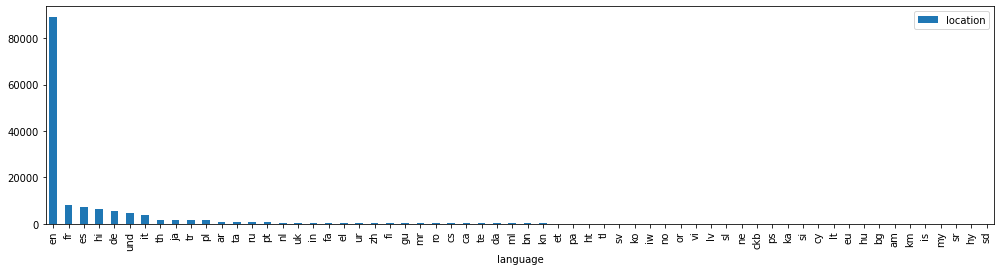


############### 0228_UkraineCombinedTweetsDeduped_part2.csv.gzip


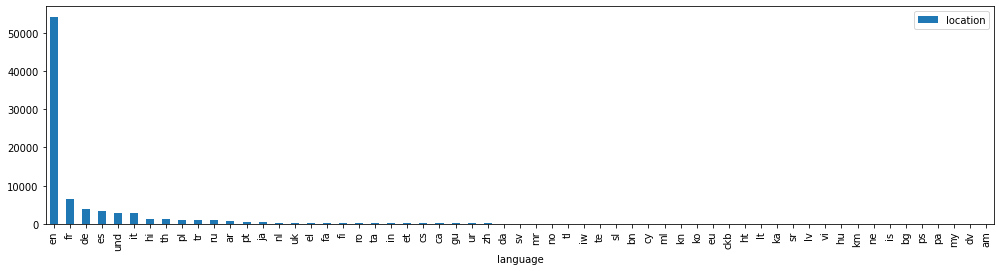


############### 0301_UkraineCombinedTweetsDeduped.csv.gzip


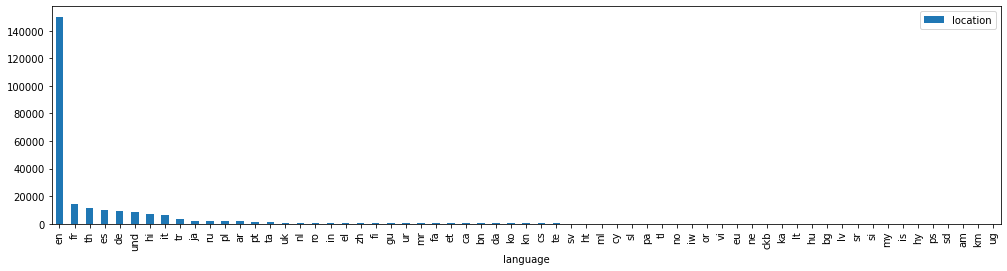


############### 0302_UkraineCombinedTweetsDeduped.csv.gzip


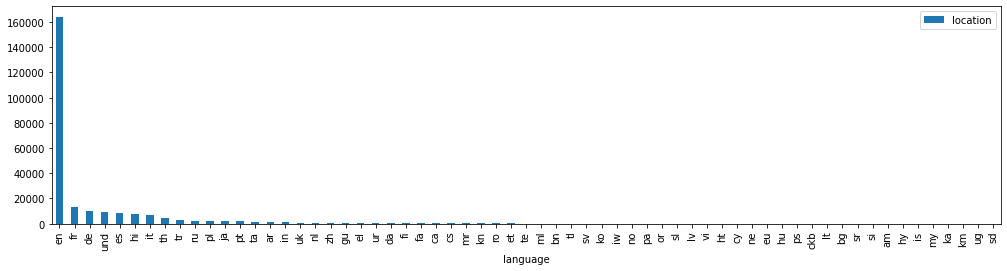


############### 0303_UkraineCombinedTweetsDeduped.csv.gzip


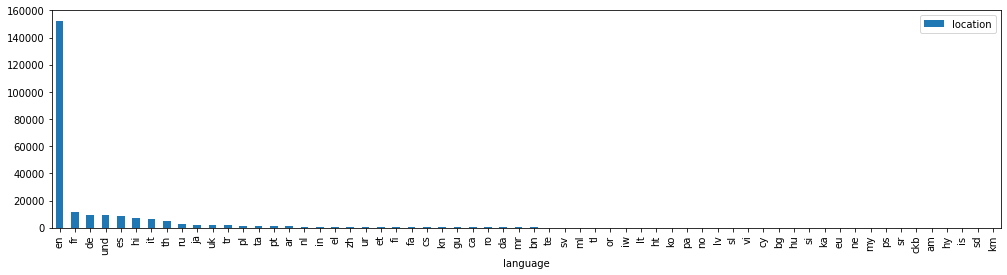


############### 0304_UkraineCombinedTweetsDeduped.csv.gzip


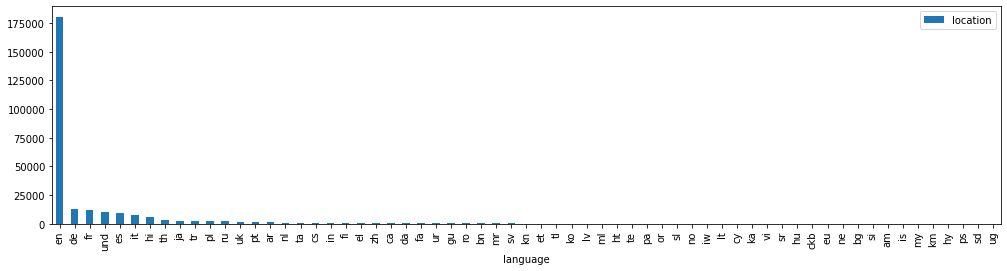


############### 0305_UkraineCombinedTweetsDeduped.csv.gzip


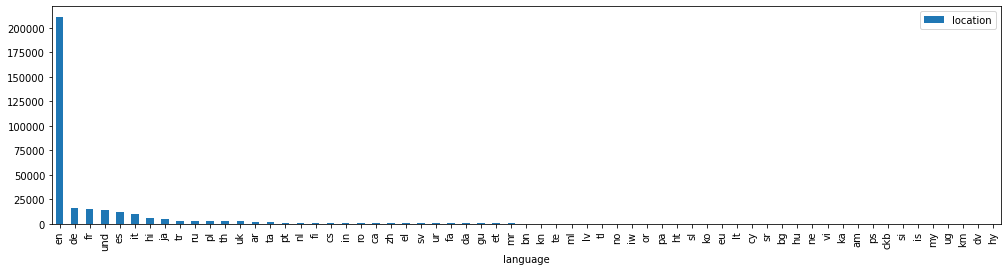


############### 0306_UkraineCombinedTweetsDeduped.csv.gzip


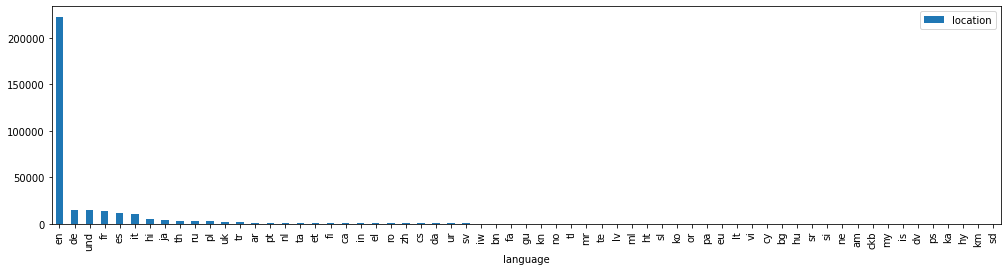


############### 0307_UkraineCombinedTweetsDeduped.csv.gzip


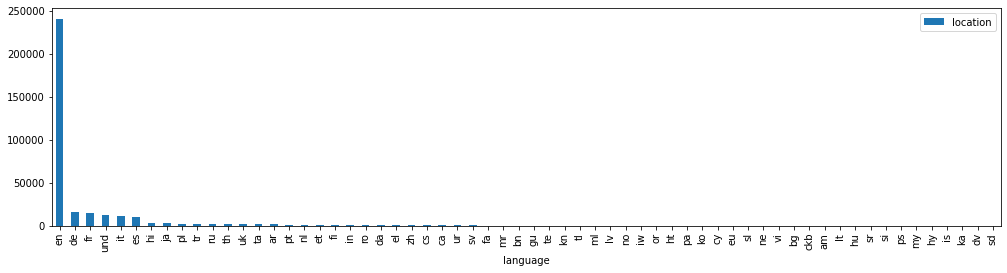


############### 0308_UkraineCombinedTweetsDeduped.csv.gzip


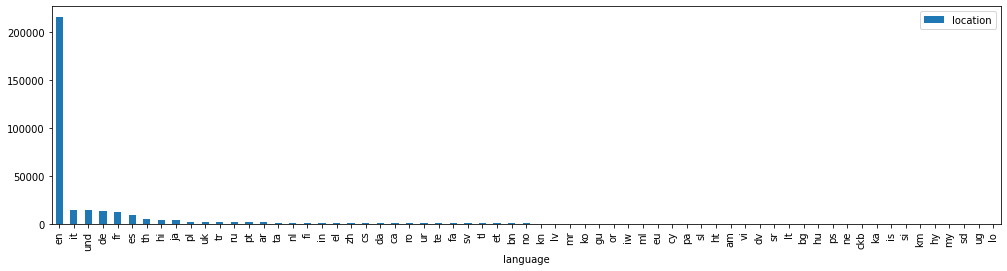


############### 0309_UkraineCombinedTweetsDeduped.csv.gzip


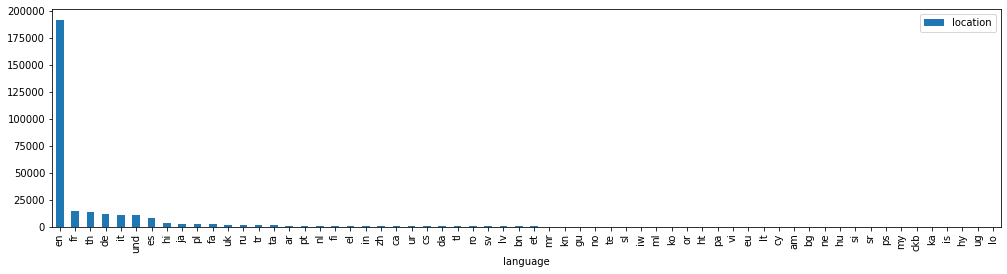


############### 0310_UkraineCombinedTweetsDeduped.csv.gzip


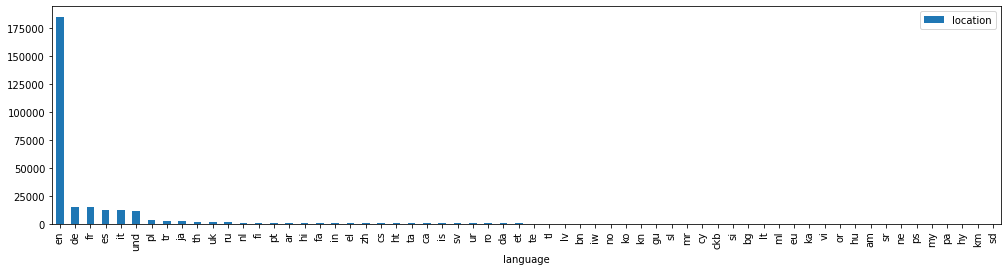


############### 0311_UkraineCombinedTweetsDeduped.csv.gzip


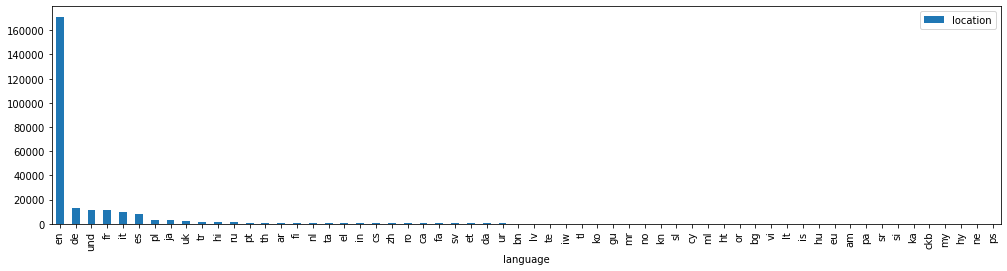


############### 0312_UkraineCombinedTweetsDeduped.csv.gzip


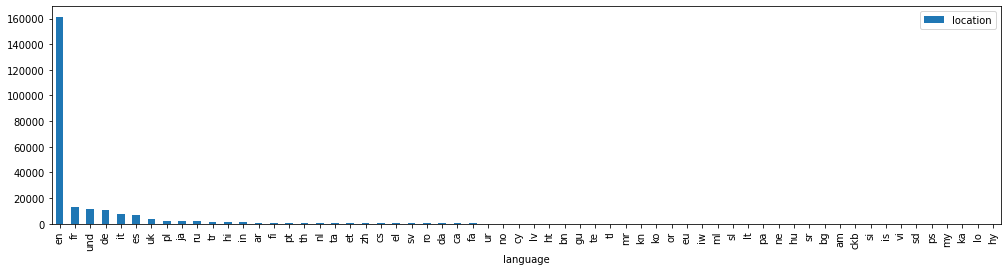


############### 0313_UkraineCombinedTweetsDeduped.csv.gzip


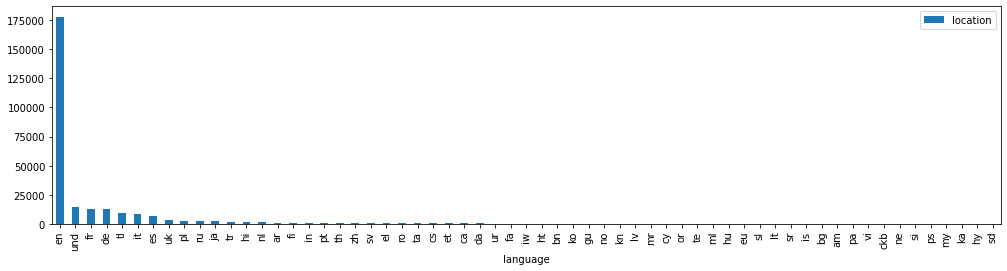


############### 0314_UkraineCombinedTweetsDeduped.csv.gzip


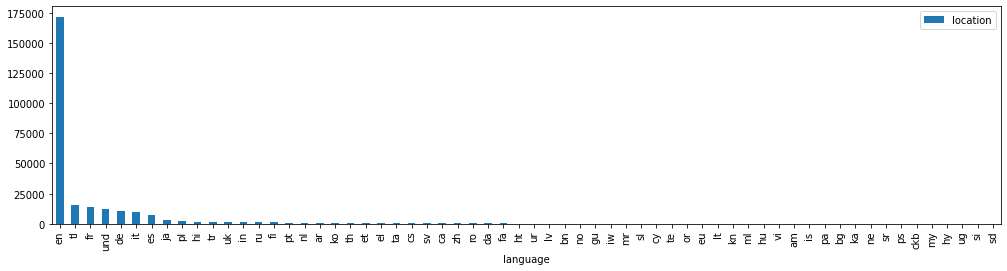


############### 0315_UkraineCombinedTweetsDeduped.csv.gzip


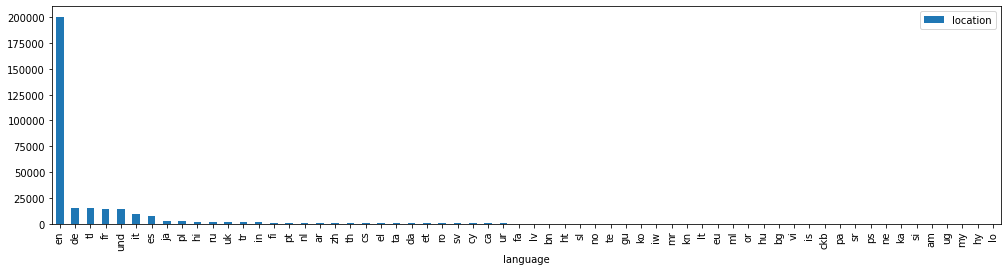


############### 0316_UkraineCombinedTweetsDeduped.csv.gzip


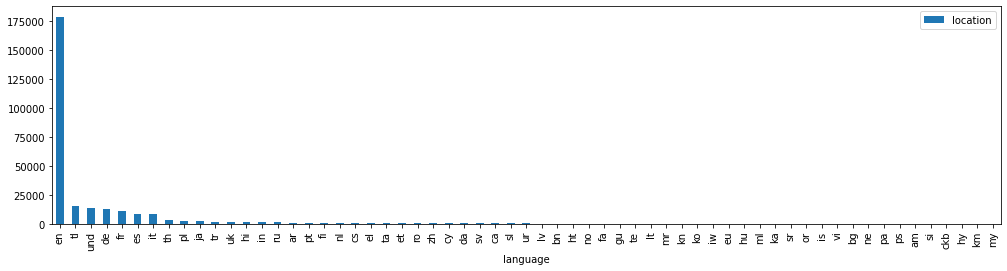


############### 0317_UkraineCombinedTweetsDeduped.csv.gzip


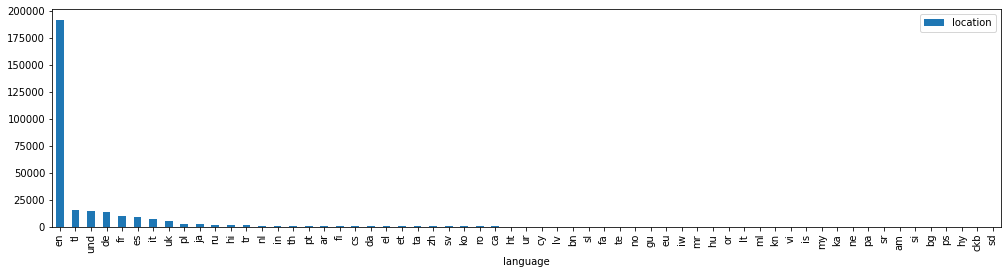


############### 0318_UkraineCombinedTweetsDeduped.csv.gzip


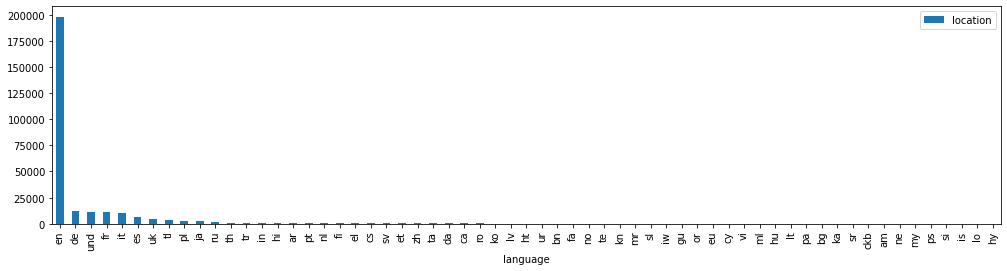


############### 0319_UkraineCombinedTweetsDeduped.csv.gzip


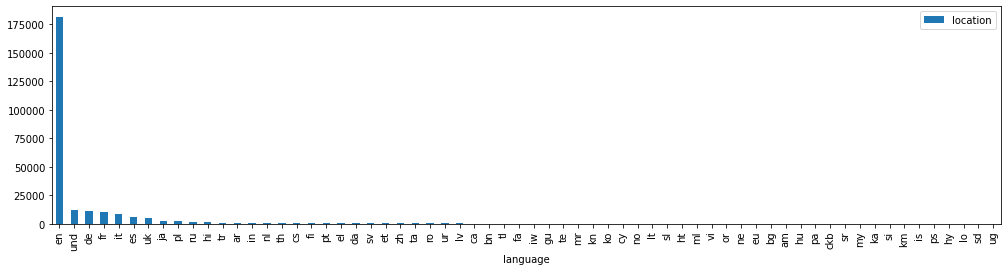


############### 0320_UkraineCombinedTweetsDeduped.csv.gzip


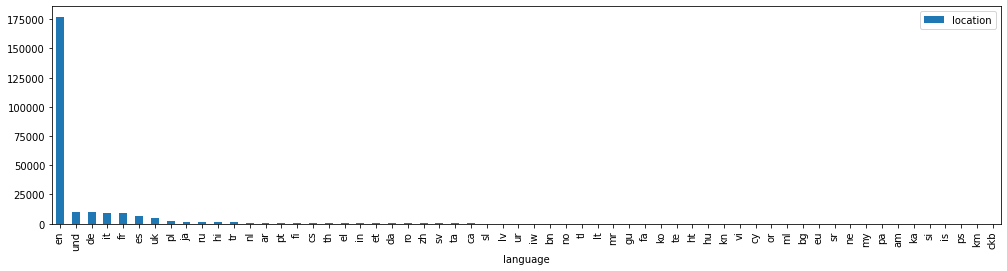


############### 0321_UkraineCombinedTweetsDeduped.csv.gzip


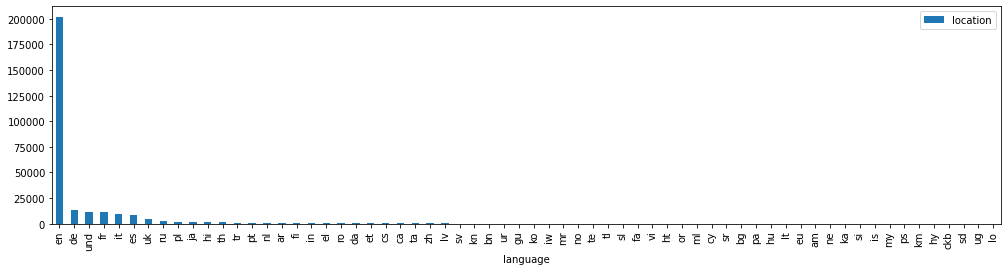


############### 0322_UkraineCombinedTweetsDeduped.csv.gzip


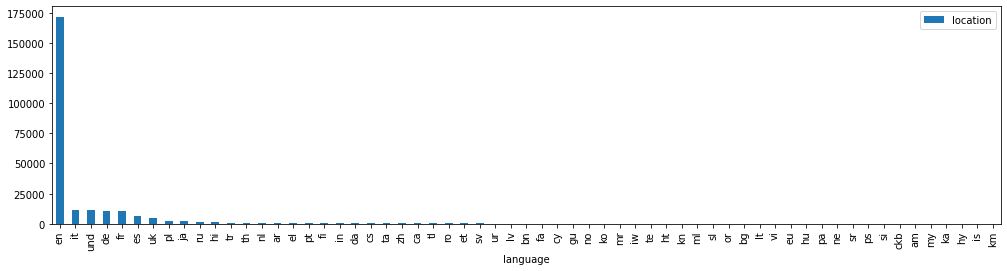


############### 0323_UkraineCombinedTweetsDeduped.csv.gzip


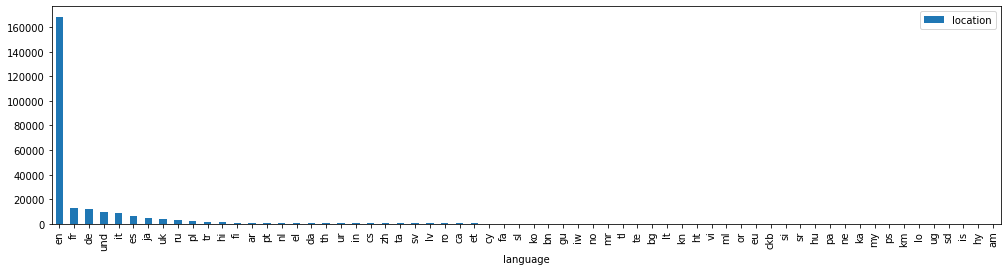


############### 0324_UkraineCombinedTweetsDeduped.csv.gzip


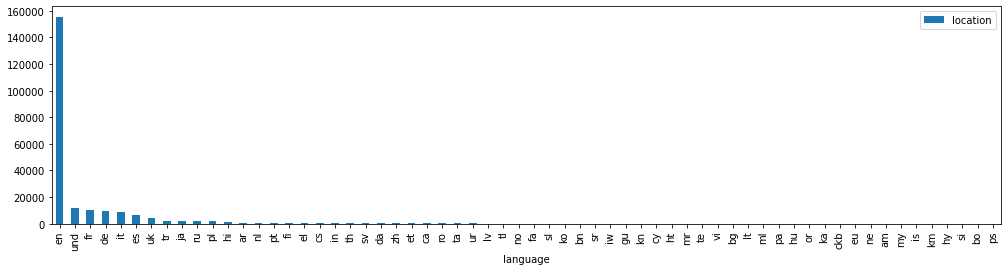


############### 0325_UkraineCombinedTweetsDeduped.csv.gzip


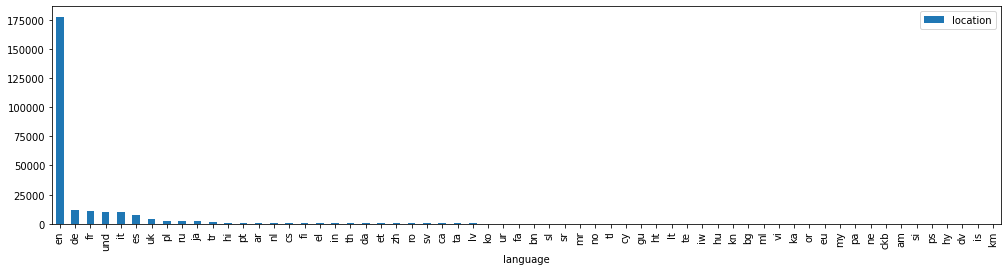


############### 0326_UkraineCombinedTweetsDeduped.csv.gzip


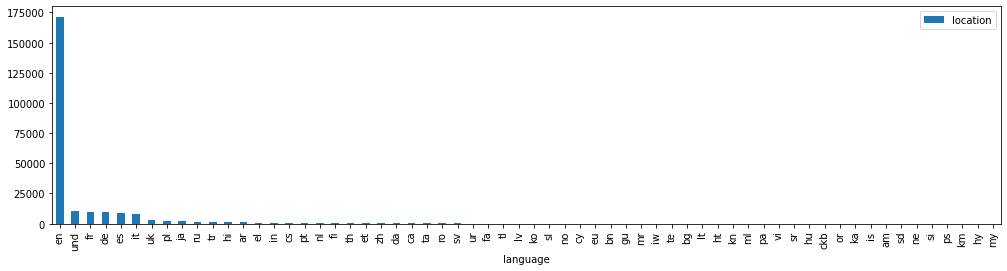


############### 0328_UkraineCombinedTweetsDeduped.csv.gzip


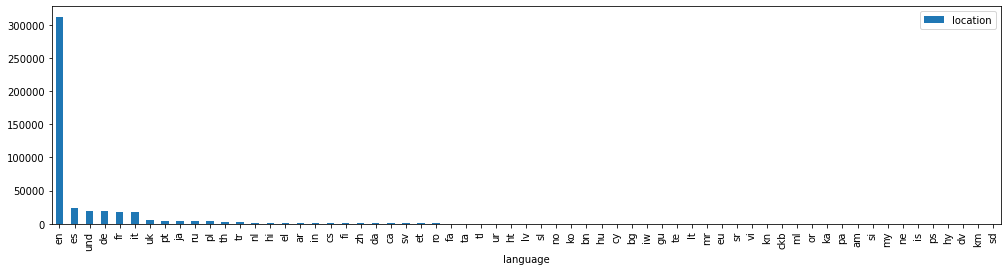


############### 0329_UkraineCombinedTweetsDeduped.csv.gzip


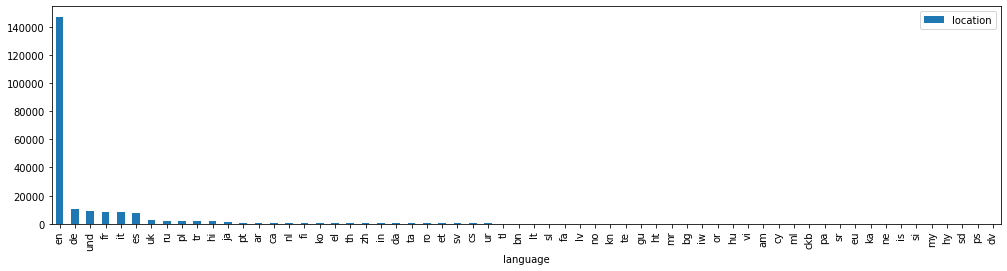


############### 0330_UkraineCombinedTweetsDeduped_REAL.csv.gzip


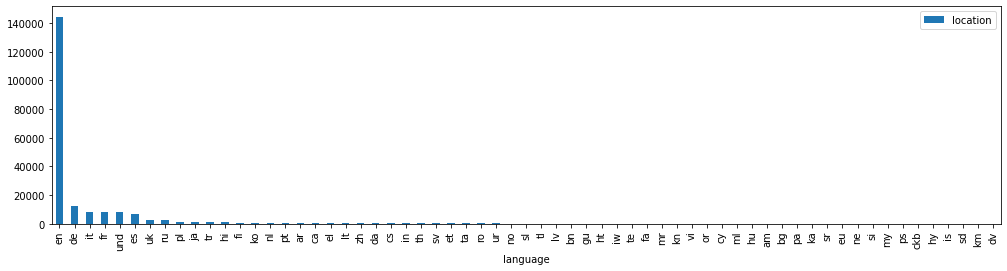


############### 0331_UkraineCombinedTweetsDeduped.csv.gzip


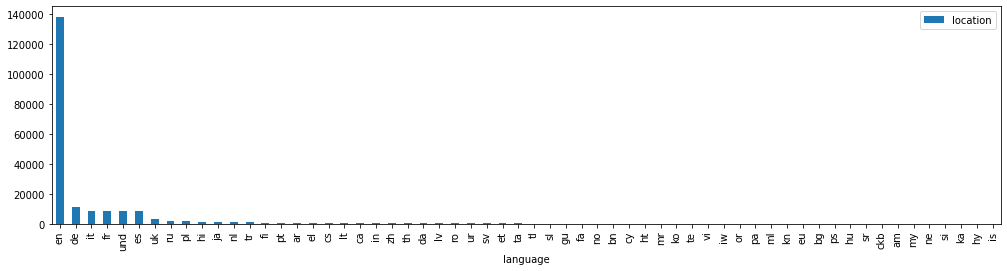


############### 0401_UkraineCombinedTweetsDeduped.csv.gzip


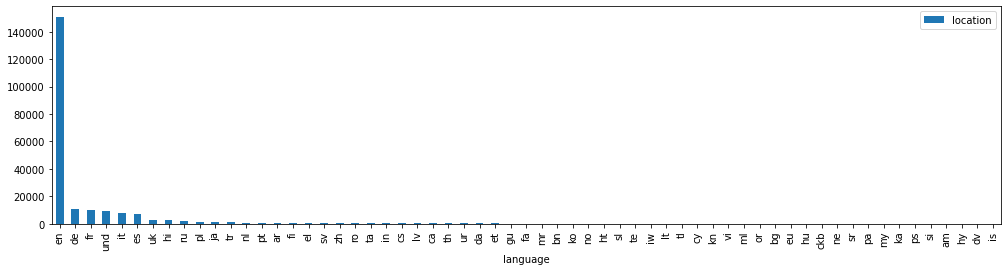


############### 0402_UkraineCombinedTweetsDeduped.csv.gzip


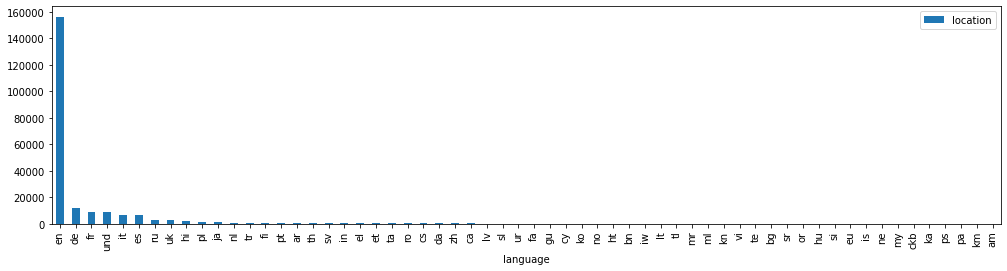


############### 0403_UkraineCombinedTweetsDeduped.csv.gzip


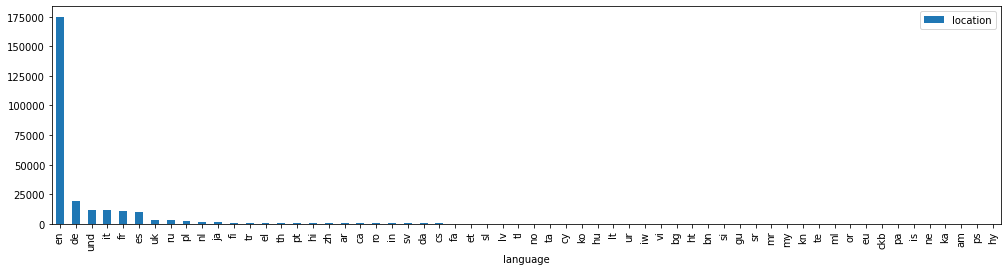


############### 0404_UkraineCombinedTweetsDeduped.csv.gzip


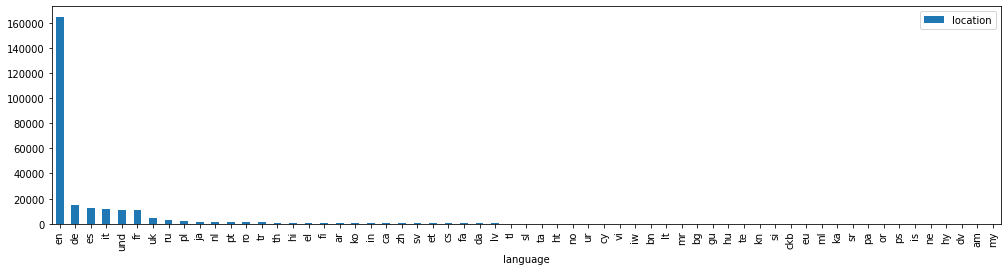


############### 0405_UkraineCombinedTweetsDeduped.csv.gzip


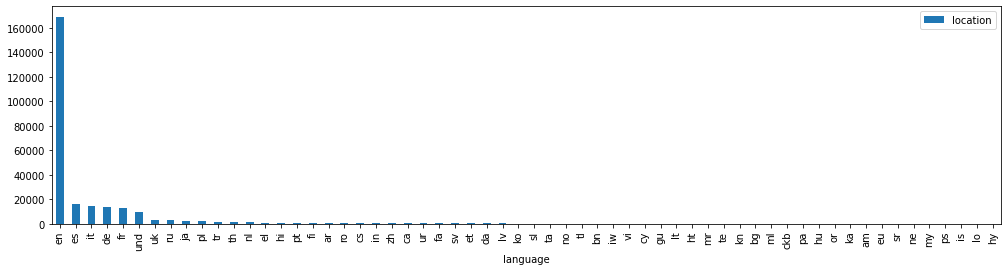

In [152]:
for f in tweets_files:
    # load tweets
    tmp = pd.read_csv(tweets_loc+f, compression='gzip')
    # plot
    print(f"\n############### {f}")
    tmp.groupby('language').count()['location'].reset_index().sort_values("location", ascending=False).plot(x='language', y='location', kind='bar', figsize=(17, 4))
    plt.show()